# Stationary Series
### Characteristics
### 1.Constant Mean
### 2.Constant Variance
### 3.Constant Auto Corelation


![](image.png)

## In order to check whether a series is stationary or not we can check it using the Dickey Fuller test which check the presence of unit root, if present then the series is termed as non stationary
## We use its updated form which which is AGF(Augmented Dickey Fuller Test)

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from pandas import read_csv

In [2]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0).squeeze('columns')

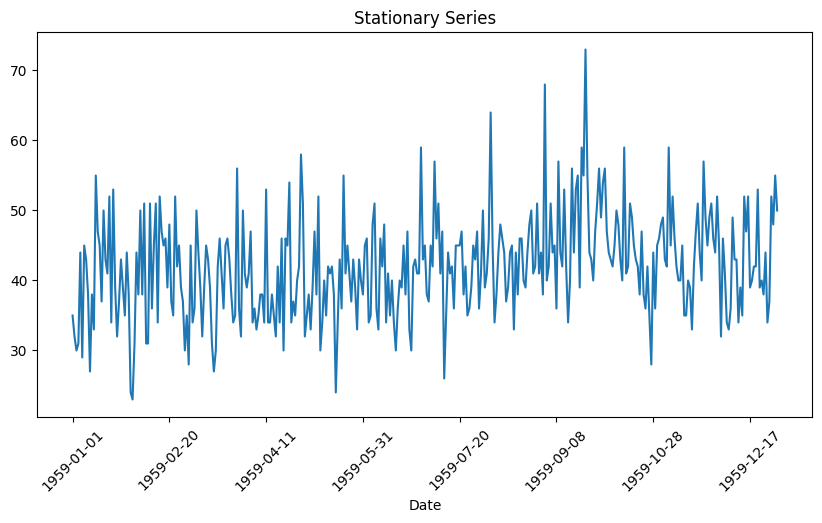

In [3]:
plt.figure(figsize=(10,5))
series.plot()
plt.title('Stationary Series')
plt.xticks(rotation = 45)
plt.show()

In [4]:
X = series.values

In [5]:
# Doing the Dickey fuller test
result = adfuller(X)

In [6]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


**p-value is less than 0.05 then it is considered to be stationary else non stationary**<br>
**We can also check by seeing that our ADF Value calculated < Crticial values hence it is stationary**

# Non Stationary Series

In [7]:
series_2 = pd.read_csv('airline-passengers_data.csv', header=0, index_col=0).squeeze('columns')

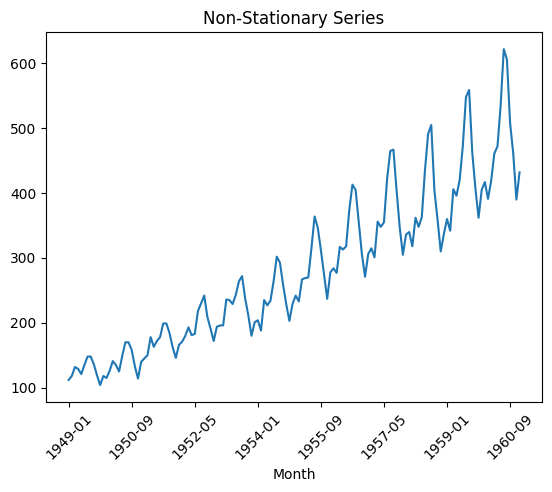

In [22]:
series_2.plot()
plt.title('Non-Stationary Series')
plt.xticks(rotation = 45)
plt.show()

In [8]:
X_2 = series_2.values

In [9]:
# Doing the Dickey Fuller Test
result_2 = adfuller(X_2)

In [10]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Here we can clearly see that the p-value is greate than 0.05 , hence non-stationary**<br>
**We can also see that out ADF calculated > Critical Values , hence non-stationary**

# Differencing

### Used to convert the non stationary series into Stationary
### We can also use other method such as square root,log,box-cox transformation

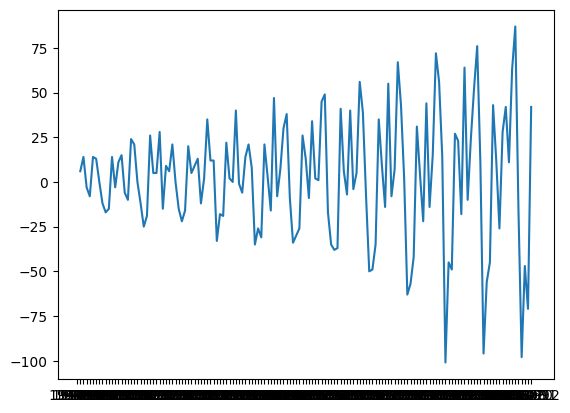

In [12]:
# First order differencing
diff_2 = series_2.diff()
plt.plot(diff_2)
plt.show()

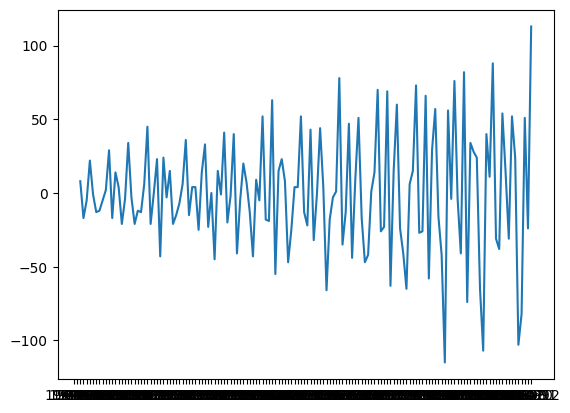

In [13]:
# Second order differencing
diff_2 = series_2.diff().diff()
plt.plot(diff_2)
plt.show()

## Another example

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3024\4142418058.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse).squeeze('columns')


<Axes: xlabel='Month'>

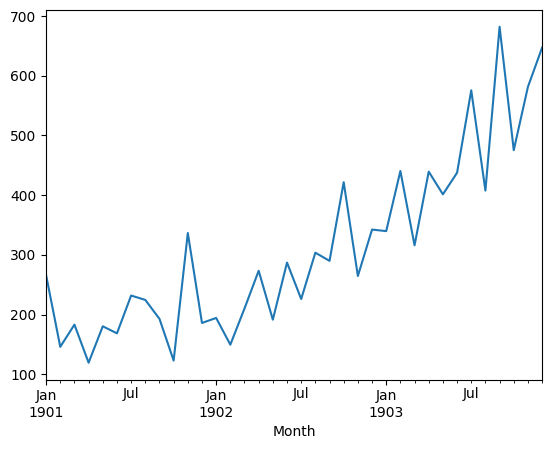

In [14]:
from datetime import datetime
dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')
series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse).squeeze('columns')
series_3.plot()

In [15]:
X_3=series_3.values

In [16]:
# Doing first order differencing
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [17]:
diff=difference(X_3)

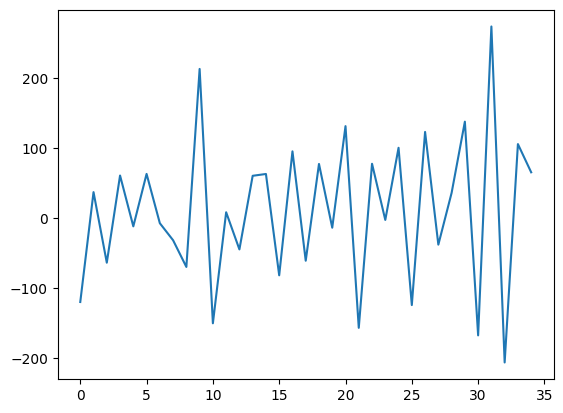

In [18]:
plt.plot(diff)